Importando as bibliotecas

In [158]:
#!pip install -U pandasql
import pandas as pd
import numpy as np
import pandasql
import matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

1 - Leitura do  "df_OVINI_preparado.csv" e criando o dataframe


In [159]:
#Leitura CSV
ovnis = pd.read_csv('df_OVNI_preparado.csv')

ovnis

,Unnamed: 0,Unnamed: 0.1,City,State,Shape,Sight_Date,Sight_Time,Sight_Weekday,Sight_Day,Sight_Month
0,0,0,Solomons Island,MD,Disk,9/22/97,20:00,Segunda-feira,22,9
1,1,1,Garden Grove,CA,Rectangle,9/19/97,NaN,Sexta-feira,19,9
2,2,2,Houston,TX,Disk,9/15/97,00:00,Segunda-feira,15,9
3,3,3,Santa Fe,NM,Light,9/15/97,20:00,Segunda-feira,15,9
4,4,4,Kent,WA,Sphere,9/15/97,20:00,Segunda-feira,15,9
...,...,...,...,...,...,...,...,...,...,...
55053,55053,55053,San Bernardino,CA,Light,12/1/16,18:17,Quinta-feira,1,12
55054,55054,55054,Amherst,NY,Oval,12/1/16,18:00,Quinta-feira,1,12
55055,55055,55055,Montgomery,AL,Circle,12/1/16,17:30,Quinta-feira,1,12
55056,55056,55056,Asbury Park,NJ,Oval,12/1/16,16:30,Quinta-feira,1,12


1.1 Recuperar os dados (do arquivo df_OVNI_preparado) de visualização sobre a cidade de Phoenix agrupados por dia, por mês e por ano;

In [160]:
#Converter a coluna em data
ovnis['Date'] = pd.to_datetime(ovnis['Sight_Date'])
ovnis



,Unnamed: 0,Unnamed: 0.1,City,State,Shape,Sight_Date,Sight_Time,Sight_Weekday,Sight_Day,Sight_Month,Date
0,0,0,Solomons Island,MD,Disk,9/22/97,20:00,Segunda-feira,22,9,1997-09-22
1,1,1,Garden Grove,CA,Rectangle,9/19/97,NaN,Sexta-feira,19,9,1997-09-19
2,2,2,Houston,TX,Disk,9/15/97,00:00,Segunda-feira,15,9,1997-09-15
3,3,3,Santa Fe,NM,Light,9/15/97,20:00,Segunda-feira,15,9,1997-09-15
4,4,4,Kent,WA,Sphere,9/15/97,20:00,Segunda-feira,15,9,1997-09-15
...,...,...,...,...,...,...,...,...,...,...,...
55053,55053,55053,San Bernardino,CA,Light,12/1/16,18:17,Quinta-feira,1,12,2016-12-01
55054,55054,55054,Amherst,NY,Oval,12/1/16,18:00,Quinta-feira,1,12,2016-12-01
55055,55055,55055,Montgomery,AL,Circle,12/1/16,17:30,Quinta-feira,1,12,2016-12-01
55056,55056,55056,Asbury Park,NJ,Oval,12/1/16,16:30,Quinta-feira,1,12,2016-12-01


1.2 - Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).

In [161]:
#Ordenar datas
dados_phoenix = ovnis[ovnis['City']=='Phoenix']
dados_phoenix.sort_values(by=['Date'], inplace=True, ascending=True)
dados_phoenix
#print(type(dados_phoenix))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Unnamed: 0.1,City,State,Shape,Sight_Date,Sight_Time,Sight_Weekday,Sight_Day,Sight_Month,Date
2804,2804,2804,Phoenix,AZ,Disk,6/12/99,02:30,Sábado,12,6,1999-06-12
3253,3253,3253,Phoenix,AZ,Changing,11/12/01,23:33,Segunda-feira,12,11,2001-11-12
3443,3443,3443,Phoenix,AZ,Cigar,5/31/03,13:00,Sábado,31,5,2003-05-31
3812,3812,3812,Phoenix,AZ,Light,2/21/05,18:00,Segunda-feira,21,2,2005-02-21
3820,3820,3820,Phoenix,AZ,Light,3/20/05,03:30,Domingo,20,3,2005-03-20
...,...,...,...,...,...,...,...,...,...,...,...
1729,1729,1729,Phoenix,AZ,Other,6/15/17,15:35,Quinta-feira,15,6,2017-06-15
2171,2171,2171,Phoenix,AZ,Oval,7/6/17,21:25,Quinta-feira,6,7,2017-07-06
1948,1948,1948,Phoenix,AZ,Fireball,7/26/17,04:20,Quarta-feira,26,7,2017-07-26
2579,2579,2579,Phoenix,AZ,Flash,8/4/17,21:15,Sexta-feira,4,8,2017-08-04


In [163]:
#Filtro de dados
q = """
SELECT Date, Count(*) as Views
FROM dados_phoenix
group by Sight_Day,  Sight_Month 
order by Date 
"""

df1 = pandasql.sqldf(q, locals())
df1


,Date,Views
0,2001-11-12 00:00:00.000000,1
1,2003-05-31 00:00:00.000000,1
2,2005-06-08 00:00:00.000000,1
3,2006-04-30 00:00:00.000000,1
4,2006-05-21 00:00:00.000000,1
...,...,...
198,2017-06-15 00:00:00.000000,2
199,2017-07-06 00:00:00.000000,1
200,2017-07-26 00:00:00.000000,2
201,2017-08-04 00:00:00.000000,1


2 - Visualização dos dados em forma de Série Temporal

In [164]:
#Observar o gráfico em barras da série temporal para o ano x de forma a 
#investigar como se comporta a distribuição das visualizações

#Análise do ano: 2001

#Carregar o seu arquivo OVNIS.csv em um dataframe;
temporal = pd.read_csv('df_OVNI_preparado.csv')
#temporal

#Filtro de dados
q = """
SELECT City, Sight_Month, COUNT(*)	AS total
FROM temporal
WHERE City = 'Phoenix'
GROUP BY Sight_Month
"""

df2 = pandasql.sqldf(q, locals())
df2


,City,Sight_Month,total
0,Phoenix,1,30
1,Phoenix,2,20
2,Phoenix,3,30
3,Phoenix,4,28
4,Phoenix,5,29
5,Phoenix,6,25
6,Phoenix,7,22
7,Phoenix,8,25
8,Phoenix,9,21
9,Phoenix,10,20


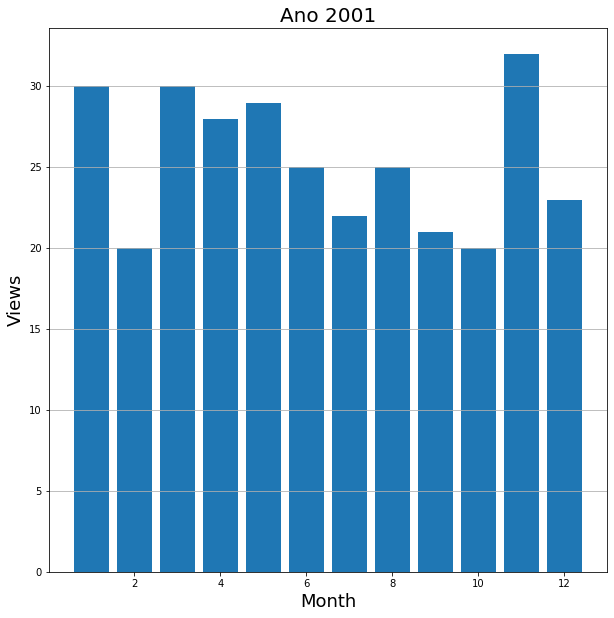

In [166]:
#gráfico em barras
valoresA = df2['Sight_Month']
valoresB = df2['total']


#a = ['Filme 0', 'Filme 1','Filme 2', 'Filme 3','Filme 4', 'Filme 5']
# Plota as barras
plt.bar(valoresA, valoresB, label = valoresA)


#Título
plt.title("Ano 2001", fontdict={'fontsize':20})

#dimenções do grafico
plt.rcParams['figure.figsize'] = (10,10)

#Grade
plt.grid(axis='y')

#Editar nomes
plt.ylabel('Views', fontsize = 18)
plt.xlabel('Month', fontsize = 18)

#Melhor local
#plt.tight_layout();
# plt.savefig('figure.png', dpi=600, bbox_inches='tight')
plt.show()

In [168]:
#Coluna ano
ovnis['Year'] = ovnis['Sight_Date'].str.split('/', expand = True)[2]
#ovnis

#Filtro de dados
q = """
SELECT City, Sight_Day, Sight_Month, Year
FROM ovnis
WHERE City = 'Phoenix'

"""

df2 = pandasql.sqldf(q, locals())
df2

,City,Sight_Day,Sight_Month,Year
0,Phoenix,29,1,17
1,Phoenix,15,1,17
2,Phoenix,28,2,17
3,Phoenix,21,2,17
4,Phoenix,3,2,17
...,...,...,...,...
300,Phoenix,10,11,16
301,Phoenix,10,11,16
302,Phoenix,31,12,16
303,Phoenix,31,12,16


In [169]:
#Quantidade de visualizações por ano

q = """
SELECT Year, COUNT(*)	AS total
FROM df2
GROUP BY Year
order by Year
"""

agrupar = pandasql.sqldf(q, locals())
agrupar

,Year,total
0,01,1
1,03,1
2,05,5
3,06,21
4,07,12
5,08,31
6,09,25
7,10,15
8,11,13
9,12,28


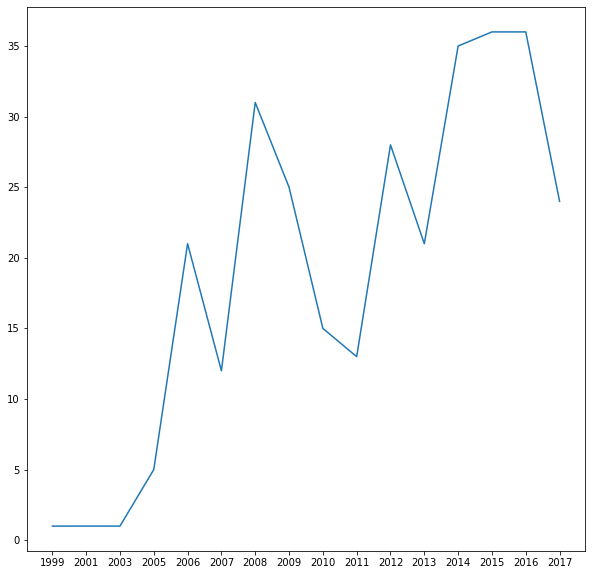

In [170]:
#gráfico de linha

anos = ['1999', '2001', '2003', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
valores = [1, 1, 1, 5, 21, 12, 31, 25, 15, 13, 28, 21, 35, 36, 36, 24]


# anos = agrupar.Year
# valores = agrupar.total

matplotlib.pyplot.plot(anos, valores)

matplotlib.pyplot.show()

Parte 3

Salvar o arquivo CSV Final

In [171]:
#Gerar um arquivo csv
dados_phoenix.to_csv('df_OVNI_fim.csv')
